In [1]:
%matplotlib inline
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avisos_detalles = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

## Vamos a analizar este set de datos

Empezamos dandole un vistazo

In [3]:
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [4]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


Vemos que las columnas 'ciudad' y 'nombre_zona' casi no tienen ocurrencias, por lo que no las vamos a usar. Además son muy pocas las filas a las que le falta denominación empresa, por lo que en un principio vaos a quitar estas filas tambien para tener los datos completos y hacer un mejor análisis inicial.

In [3]:
avisos_detalles = avisos_detalles.dropna(axis = 0, subset = ['denominacion_empresa'], how = 'any')

In [6]:
avisos_detalles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13529 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13529 non-null int64
idpais                  13529 non-null int64
titulo                  13529 non-null object
descripcion             13529 non-null object
nombre_zona             13529 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13529 non-null object
nivel_laboral           13529 non-null object
nombre_area             13529 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


### Le damos un vistazo a cada columna
Así tendremos un mejor conocimiento del set de datos

In [7]:
avisos_detalles['idaviso'].value_counts().head()

1112381437    1
1112306395    1
1112226562    1
1111335681    1
1112320768    1
Name: idaviso, dtype: int64

Como era de esperar, los ids son todos diferentes, por lo que no hay repetidos

In [8]:
avisos_detalles['descripcion'].describe()

count                                                 13529
unique                                                12669
top       <p>Nos encontramos en la búsqueda de un ANALIS...
freq                                                     19
Name: descripcion, dtype: object

In [9]:
avisos_detalles['titulo'].describe()

count                                                 13529
unique                                                11645
top       Analistas de Testing Ssr/Sr con Automatización...
freq                                                     22
Name: titulo, dtype: object

Estas columnas son muy dispersas, ya que vemos que hay casi tantos valores únicos como filas. Sin embargo nos llama la atención que, sobre todo en la columna 'descripción' hay algunos cuantos valores iguales

## Columna: "tipo_de_trabajo"

In [10]:
avisos_detalles['tipo_de_trabajo'].describe()

count         13529
unique            9
top       Full-time
freq          12335
Name: tipo_de_trabajo, dtype: object

In [11]:
avisos_detalles['tipo_de_trabajo'].value_counts()

Full-time          12335
Part-time            862
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

Ya que hay pocos valores posibles para esta columna, la vamos a convertir el tipo de dato en categoría, así ahorramos memoria y nos facilita algunos plots y análisis posteriores

In [4]:
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].astype('category')

También vamos a plasmar en un gráfico las apariciones de cada categoría

In [28]:
def autolabel(rects, mysize):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(1.05*width,rect.get_y() + rect.get_height()/2.,
                '%d' % int(width),
                ha='left', va='center',size = mysize)

In [29]:
values = avisos_detalles['tipo_de_trabajo'].value_counts().values

In [30]:
indexes = avisos_detalles['tipo_de_trabajo'].value_counts().index

In [17]:
indexes

CategoricalIndex([u'Full-time', u'Part-time', u'Teletrabajo', u'Por Horas',
                  u'Pasantia', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo'],
                 categories=[u'Fines de Semana', u'Full-time', u'Part-time', u'Pasantia', u'Por Contrato', u'Por Horas', u'Primer empleo', u'Teletrabajo', ...], ordered=False, dtype='category')

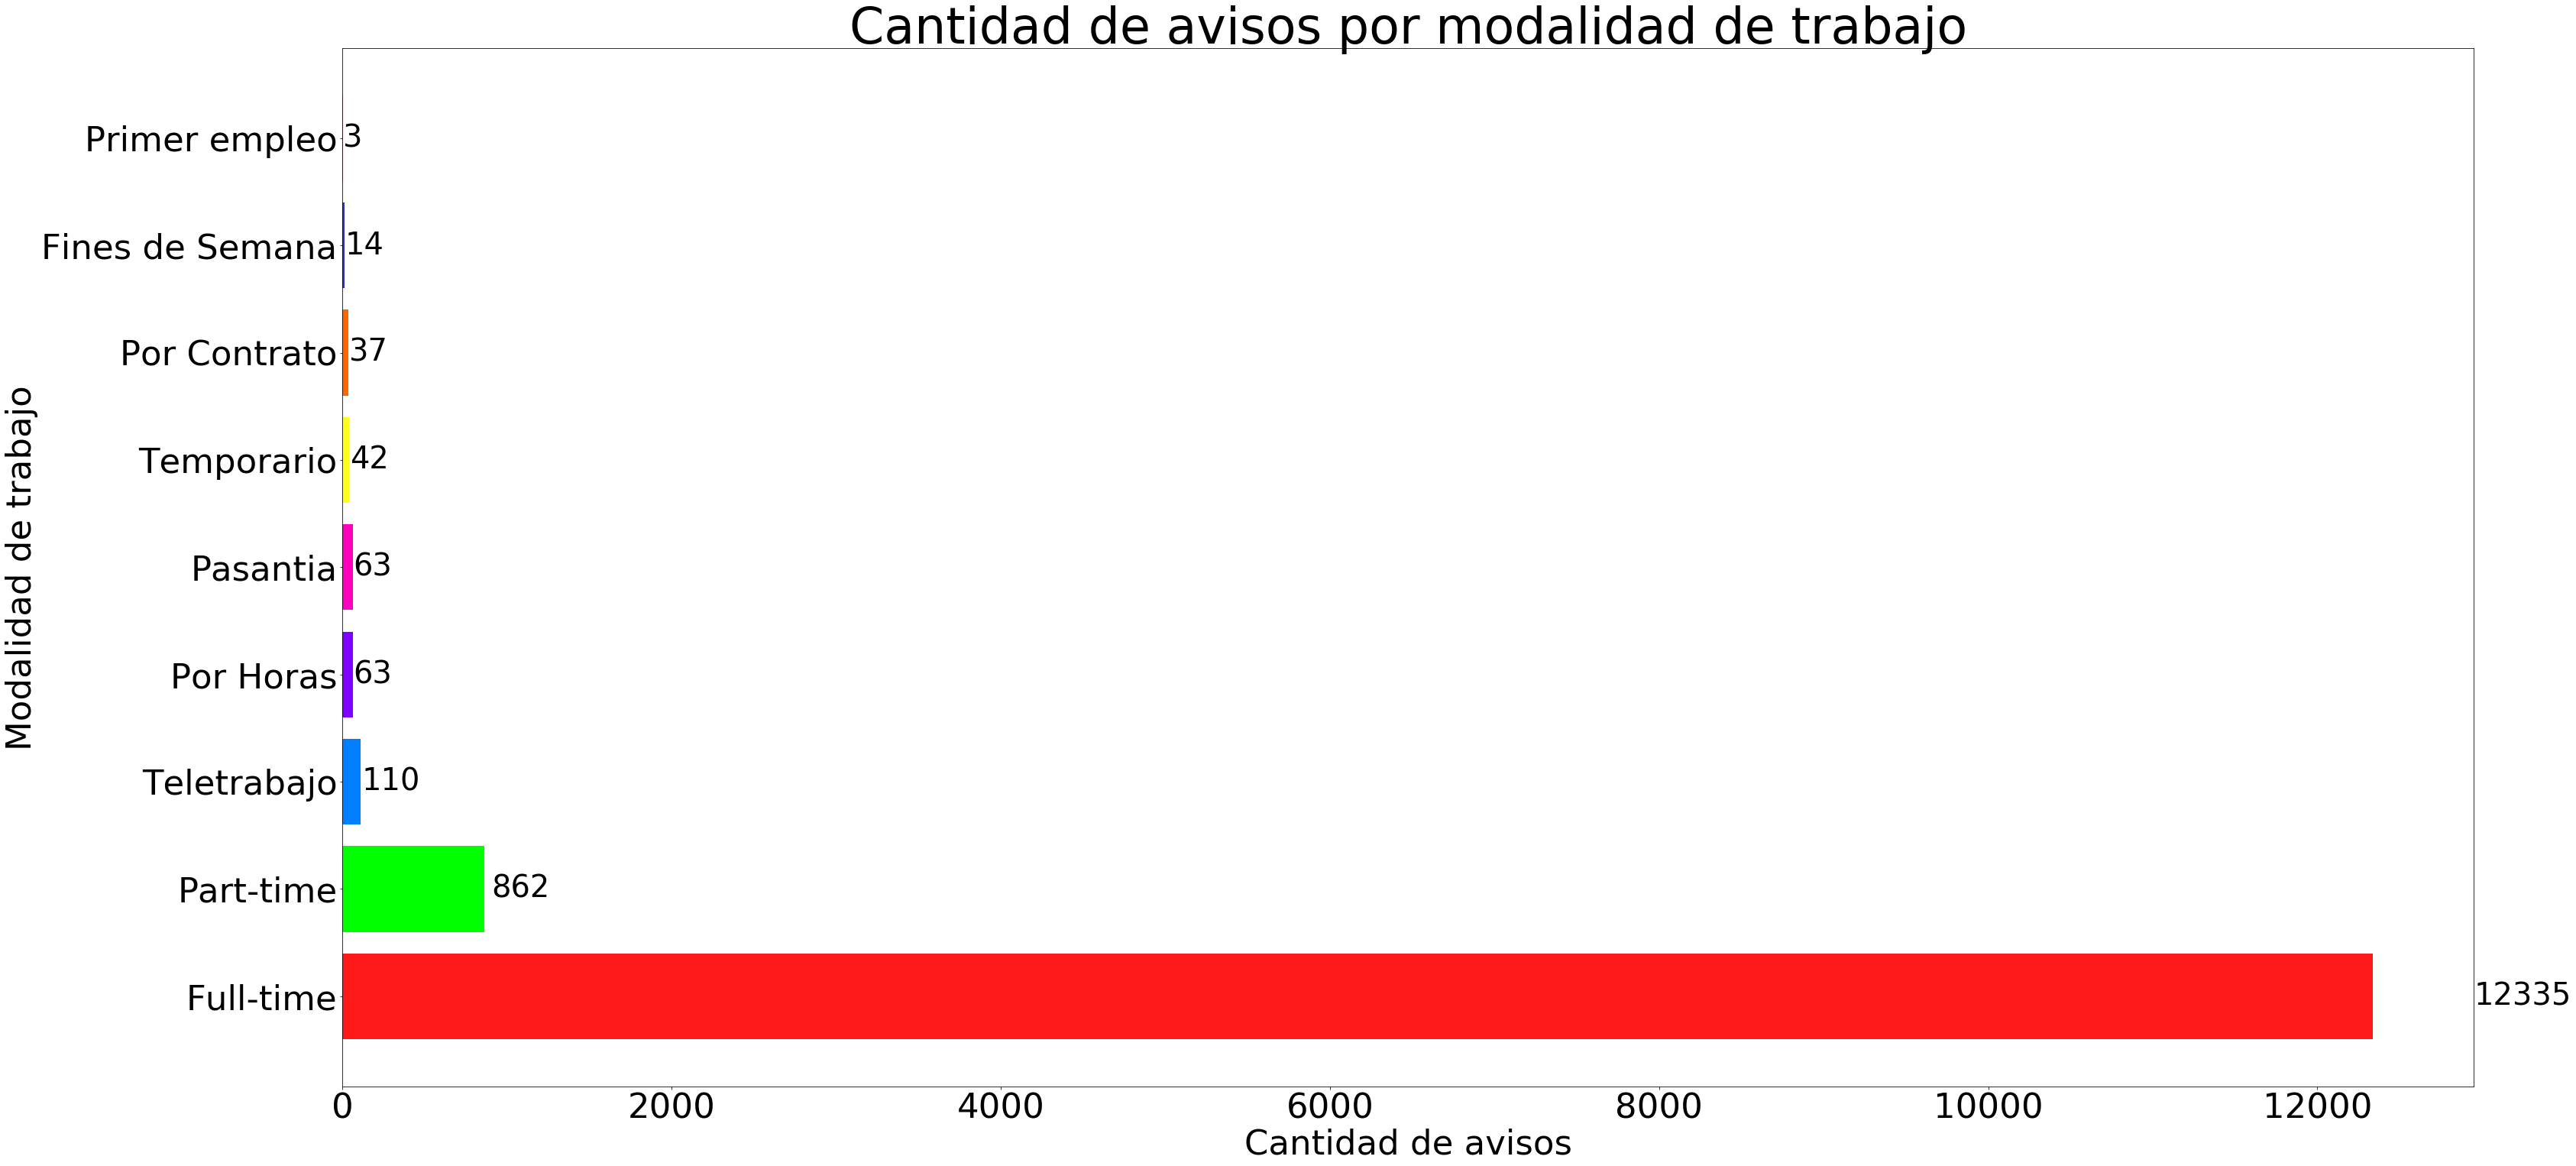

In [32]:
fig, ax = plt.subplots(figsize=(50,25))
autolabel(ax.barh(np.arange(9), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a','#ff6600', '#3333cc', '#ff80aa' ]), 40)
ax.set_yticks(np.arange(9))
ax.set_yticklabels(indexes, size = 45)
ax.set_xticklabels([0, 2000,4000,6000,8000,10000,12000], size = 45)
ax.set_title('Cantidad de avisos por modalidad de trabajo', size = 65)
ax.set_xlabel('Cantidad de avisos', size = 45)
ax.set_ylabel('Modalidad de trabajo', size = 45)

Como hay un gran porcentaje de trabajos ful-time, no se llega a ver bien la distribucion. Vamos a excluir los full-time en una nueva vizualización.

In [35]:
values = avisos_detalles.loc[avisos_detalles['tipo_de_trabajo'] != 'Full-time']['tipo_de_trabajo'].value_counts().values

In [36]:
indexes = avisos_detalles.loc[avisos_detalles['tipo_de_trabajo'] != 'Full-time']['tipo_de_trabajo'].value_counts().index

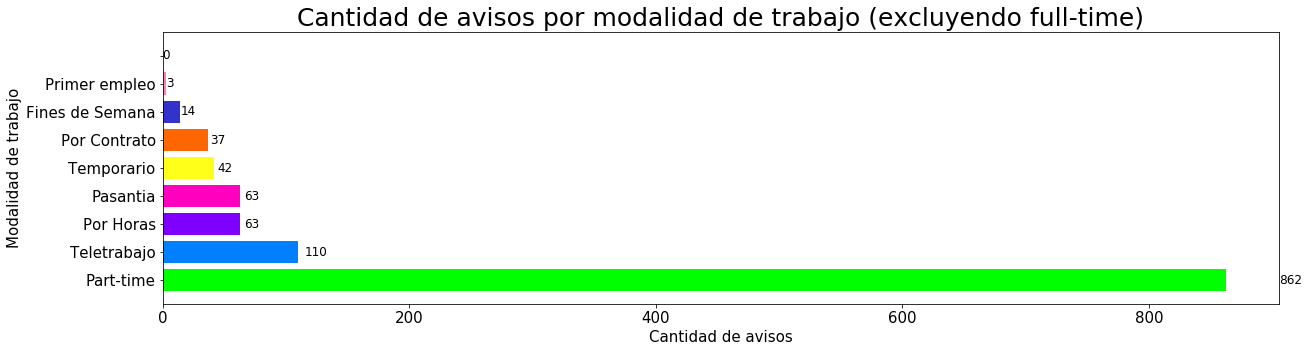

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
autolabel(ax.barh(np.arange(9), values ,   color = ['#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a','#ff6600', '#3333cc', '#ff80aa' ]),12)
ax.set_yticks(np.arange(9))
indexes = [ u'Part-time', u'Teletrabajo', u'Por Horas',
                  u'Pasantia', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo']
ax.set_yticklabels(indexes, size = 15)
ax.set_xticklabels([0, 200,400,600,800], size = 15)
ax.set_title('Cantidad de avisos por modalidad de trabajo (excluyendo full-time)', size = 25)
ax.set_xlabel('Cantidad de avisos', size = 15)
ax.set_ylabel('Modalidad de trabajo', size = 15)

Los trabajos con modalidad full y part time, como era de esperar concentran a casi todos los avisos. Sin embargo nos resulta interesante que el tercer puesto se lo lleven los tele-trabajos.

## Columna: "nombre_zona"

In [39]:
avisos_detalles['nombre_zona'].describe()

count                 13529
unique                    4
top       Gran Buenos Aires
freq                  12649
Name: nombre_zona, dtype: object

In [41]:
avisos_detalles['nombre_zona'].value_counts()

Gran Buenos Aires              12649
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

In [42]:
avisos_detalles['ciudad'].value_counts()

Buenos Aires                14
Argentina                   13
CABA                         3
Capital Federal              2
San Isidro                   2
Vicente Lopez                1
Mendoza                      1
Santa Rosa                   1
La Plata                     1
Tortuguitas                  1
Parque Patricios             1
Barracas                     1
Microcentro                  1
paternal                     1
República Argentina          1
Buenos Aires Province        1
caba                         1
Zárate, Campana, Escobar     1
Name: ciudad, dtype: int64

Casi todos los trabajos se concentran en Gran Buenos Aires y Capital Federal. Sin embargo tomamos estos datos "con pinzas" porque el "Gran Buenos Aires" incluye a la Capital federal, y a "GBA Oeste". POr ejemplo, tenemos ocurrencias que dicen "Gran Buenos Aires" en "nombre_zona" y "Capital Federal" en "ciudad", que por cierto es un campo que habíamos decidido descartar por la poca cantidad de datos. Por lo tanto no podemos saber tampoco si hay más avisos de GBA que sean particularmente de la CABA.

In [47]:
avisos_detalles[avisos_detalles['nombre_zona'] == 'Gran Buenos Aires'][avisos_detalles['ciudad'] == 'CABA'].count()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


idaviso                 2
idpais                  2
titulo                  2
descripcion             2
nombre_zona             2
ciudad                  2
mapacalle               0
tipo_de_trabajo         2
nivel_laboral           2
nombre_area             2
denominacion_empresa    2
dtype: int64

## Columna: "nivel_laboral"

In [48]:
avisos_detalles['nivel_laboral'].describe()

count                    13529
unique                       5
top       Senior / Semi-Senior
freq                      9404
Name: nivel_laboral, dtype: object

In [49]:
avisos_detalles['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9404
Junior                                  2216
Otro                                     919
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Ya que hay pocos valores posibles para esta columna, la vamos a convertir el tipo de dato en categoría, así ahorramos memoria y nos facilita algunos plots y análisis posteriores

In [5]:
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].astype('category')

In [53]:
values = avisos_detalles['nivel_laboral'].value_counts().values
indexes = avisos_detalles['nivel_laboral'].value_counts().index

In [56]:
indexes = [u'Senior / Semi-Senior', u'Junior', u'Otro',
       u'Jefe / Supervisor / Responsable',
       u'Gerencia / Alta Gerencia / Direccion']

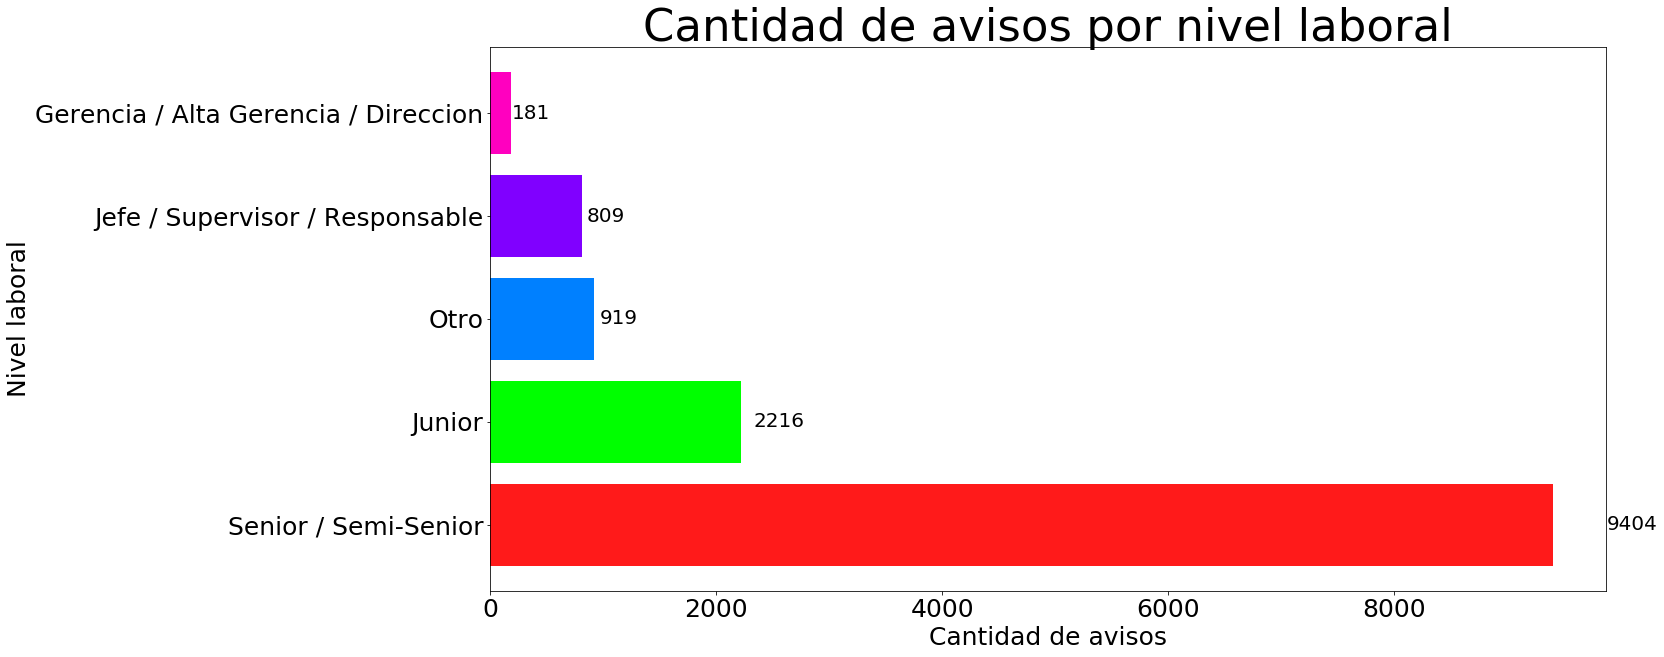

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf','#ffff1a']), 20)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes, size = 25)
ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Cantidad de avisos por nivel laboral', size = 45)
ax.set_xlabel('Cantidad de avisos', size = 25)
ax.set_ylabel('Nivel laboral', size = 25)

## Columna: "nombre_area"

In [25]:
avisos_detalles['nombre_area'].describe()

count      13529
unique       173
top       Ventas
freq        1656
Name: nombre_area, dtype: object

In [6]:
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].astype('category')

In [63]:
avisos_detalles['nombre_area'].value_counts()

Ventas                                   1656
Comercial                                 982
Administración                            901
Producción                                820
Programación                              576
Contabilidad                              416
Tecnologia / Sistemas                     388
Atención al Cliente                       347
Mantenimiento                             324
Recursos Humanos                          235
Gastronomia                               234
Oficios y Profesiones                     209
Soporte Técnico                           203
Logística                                 200
Call Center                               191
Almacén / Depósito / Expedición           184
Compras                                   170
Otros                                     153
Marketing                                 153
Administración de Personal                152
Recepcionista                             151
Transporte                        

Si bien no hay tantas categorías, para graficar se vería feo, por lo que vamos a graficar las 15 primeras

In [64]:
 values = avisos_detalles['nombre_area'].value_counts().head(15).values
indexes = avisos_detalles['nombre_area'].value_counts().head(15).index

In [67]:
indexes = [u'Ventas', u'Comercial', u'Administracion', u'Produccion',
       u'Programacion', u'Contabilidad', u'Tecnologia / Sistemas',
       u'Atencion al Cliente', u'Mantenimiento', u'Recursos Humanos',
       u'Gastronomia', u'Oficios y Profesiones', u'Soporte Tecnico',
       u'Logistica', u'Call Center']

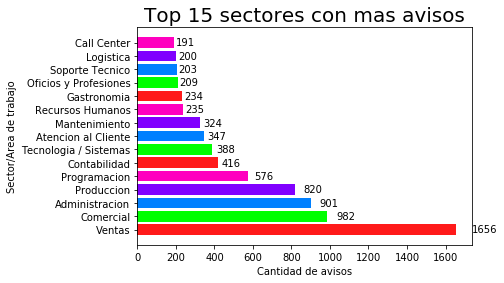

In [72]:
fig, ax = plt.subplots()#figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf']), 10)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes)#, size = 25)
#ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Top 15 sectores con mas avisos', size = 20)
ax.set_xlabel('Cantidad de avisos')#, size = 25)
ax.set_ylabel('Sector/Area de trabajo')#, size = 25)

## Columna: "denominacion_empresa"

In [26]:
avisos_detalles['denominacion_empresa'].describe()

count        13529
unique        2592
top       RANDSTAD
freq           562
Name: denominacion_empresa, dtype: object

Si bien tenemos muchos valores diferentes, nos enocontramos con un número no tan grande de empresas: 2592

In [73]:
avisos_detalles['denominacion_empresa'].value_counts()

RANDSTAD                                    562
Manpower                                    422
Grupo Gestión                               383
Assistem                                    289
SOLUTIX S.A.                                260
BAYTON                                      238
Pullmen Servicios Empresarios S.A.          229
Adecco - Región NORTE & OESTE GBA           205
Suministra                                  203
Adecco -Región Office                       200
Consultores de Empresas SRL                 197
Adecco -Región GBA SUR                      160
Complement Group (holding)                  160
Kaizen Recursos Humanos                     110
Adecco  -Región Litoral                     109
CrossOver                                   109
IT Resources                                109
Excelencia Laboral S.A.                      98
Swiss Medical Group                          88
Suple                                        88
Aliantec                                

In [74]:
 values = avisos_detalles['denominacion_empresa'].value_counts().head(15).values
indexes = avisos_detalles['denominacion_empresa'].value_counts().head(15).index

In [77]:
indexes = [u'RANDSTAD', u'Manpower', u'Grupo Gestion', u'Assistem',
       u'SOLUTIX S.A. ', u'BAYTON', u'Pullmen Servicios Empresarios S.A.',
       u'Adecco - Region NORTE & OESTE GBA', u'Suministra',
       u'Adecco -Region Office', u'Consultores de Empresas SRL',
       u'Adecco -Region GBA SUR', u'Complement Group (holding)',
       u'Kaizen Recursos Humanos', u'Adecco  -Región Litoral']

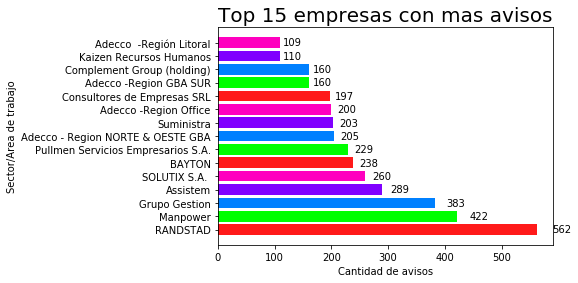

In [79]:
fig, ax = plt.subplots()#figsize=(20,10))
autolabel(ax.barh(np.arange(len(values)), values , color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf']), 10)
ax.set_yticks(np.arange(len(values)))
ax.set_yticklabels(indexes)#, size = 25)
#ax.set_xticklabels([0, 2000,4000,6000,8000], size = 25)
ax.set_title('Top 15 empresas con mas avisos', size = 20)
ax.set_xlabel('Cantidad de avisos')#, size = 25)
ax.set_ylabel('Sector/Area de trabajo')#, size = 25)

Vemos que todas las empresas que aparecen en los primeros puestos, son consultoras, lo cual tiene mucho sentido.

## Relación entre columnas

Nos quedamos con las columnas que tienen datos, ya que en un principio vamos a analizar la relación entre las columnas claves.

In [8]:
avisos_detalles.loc[:, ['tipo_de_trabajo', 'nivel_laboral', 'nombre_area']].corr()

""


In [21]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))

def eliminar_tildes(keys):
    klist = []
    for k in keys:
        klist.append(elimina_tildes(k.decode('utf-8')))
    
    return klist   

In [23]:
index = avisos_detalles['tipo_de_trabajo'].value_counts().index
avisos_detalles['tipo_de_trabajo'] = avisos_detalles['tipo_de_trabajo'].cat\
                                    .set_categories(eliminar_tildes(index))
avisos_detalles['tipo_de_trabajo'].value_counts().index

CategoricalIndex([u'Full-time', u'Part-time', u'Teletrabajo', u'Por Horas',
                  u'Pasantia', u'Temporario', u'Por Contrato',
                  u'Fines de Semana', u'Primer empleo'],
                 categories=[u'Full-time', u'Part-time', u'Teletrabajo', u'Pasantia', u'Por Horas', u'Temporario', u'Por Contrato', u'Fines de Semana', ...], ordered=False, dtype='category')

In [24]:
index = avisos_detalles['nivel_laboral'].value_counts().index
avisos_detalles['nivel_laboral'] = avisos_detalles['nivel_laboral'].cat\
                                    .set_categories(eliminar_tildes(index))
avisos_detalles['nivel_laboral'].value_counts().index

CategoricalIndex([u'Senior / Semi-Senior', u'Junior', u'Otro',
                  u'Jefe / Supervisor / Responsable',
                  u'Gerencia / Alta Gerencia / Direccion'],
                 categories=[u'Senior / Semi-Senior', u'Junior', u'Otro', u'Jefe / Supervisor / Responsable', u'Gerencia / Alta Gerencia / Direccion'], ordered=False, dtype='category')

In [48]:
pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
            columns=[avisos_detalles['nivel_laboral']], margins=True)

nivel_laboral,Senior / Semi-Senior,Junior,Otro,Jefe / Supervisor / Responsable,All
tipo_de_trabajo,,,,,
Full-time,8885,1777,749,745,12156
Part-time,372,350,132,7,861
Teletrabajo,57,1,1,50,109
Pasantia,4,49,10,0,63
Por Horas,39,8,15,1,63
Temporario,20,18,3,1,42
Por Contrato,17,10,5,5,37
Fines de Semana,10,1,3,0,14
Primer empleo,0,2,1,0,3


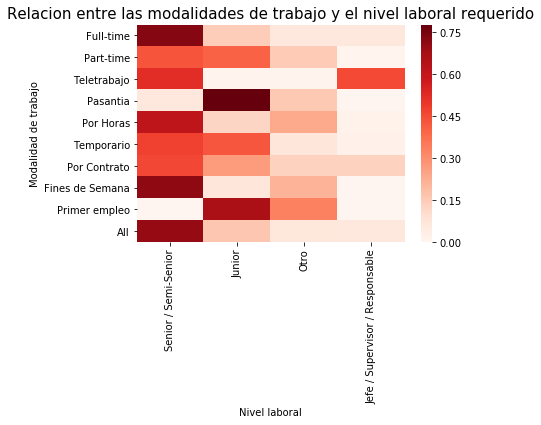

In [61]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
                        columns=[avisos_detalles['nivel_laboral']], margins=True, normalize= 'index'), cmap = 'Reds')
ax.set_title('Relacion entre las modalidades de trabajo y el nivel laboral requerido', size = 15)
ax.set_xlabel('Nivel laboral')
ax.set_ylabel('Modalidad de trabajo')

Cuanto más oscuro es el color en nuestro heatmap, más alta es la relacion que tienen entre sí. Observamos una gran correlación entre los puestos Senior y la modalidad full-time. Así como entre los puestos juniors y la spasantías y primeros empreos. 
Los Jefes y supervisores, si bien en la tabla se ve que casi siempre van de modalidad full-time, ocupan casi la mitad de los cargos con modalidad teletrabajo, lo cual nos llama un poco la atención.

In [52]:
index = avisos_detalles['nombre_area'].value_counts().head(15).index
avisos_detalles['nombre_area'] = avisos_detalles['nombre_area'].cat\
                                    .set_categories(eliminar_tildes(index))
avisos_detalles['nombre_area'].value_counts().index

CategoricalIndex([u'Ventas', u'Comercial', u'Contabilidad',
                  u'Tecnologia / Sistemas', u'Mantenimiento',
                  u'Recursos Humanos', u'Gastronomia',
                  u'Oficios y Profesiones', u'Call Center', u'Logistica',
                  u'Soporte Tecnico', u'Atencion al Cliente', u'Programacion',
                  u'Produccion', u'Administracion'],
                 categories=[u'Ventas', u'Comercial', u'Administracion', u'Produccion', u'Programacion', u'Contabilidad', u'Tecnologia / Sistemas', u'Atencion al Cliente', ...], ordered=False, dtype='category')

In [53]:
pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
            columns=[avisos_detalles['nombre_area']], margins=True)

nombre_area,Ventas,Comercial,Contabilidad,Tecnologia / Sistemas,Mantenimiento,Recursos Humanos,Gastronomia,Oficios y Profesiones,Call Center,All
tipo_de_trabajo,,,,,,,,,,
Full-time,1384,926,397,346,323,223,219,198,66,4082
Part-time,242,41,14,6,0,7,12,10,125,457
Teletrabajo,15,8,0,34,0,0,0,0,0,57
Pasantia,1,4,0,0,0,3,0,0,0,8
Por Horas,5,1,0,0,1,1,1,0,0,9
Temporario,3,2,4,1,0,0,1,0,0,11
Por Contrato,4,0,1,1,0,1,0,1,0,8
Fines de Semana,2,0,0,0,0,0,1,0,0,3
Primer empleo,0,0,0,0,0,0,0,0,0,0


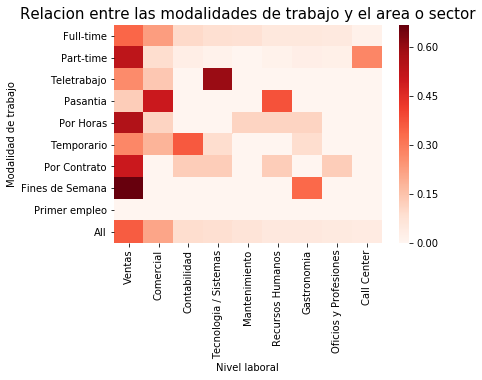

In [56]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(pd.crosstab(index=avisos_detalles['tipo_de_trabajo'],
            columns=[avisos_detalles['nombre_area']], margins=True, normalize= 'index'), cmap = 'Reds')
ax.set_title('Relacion entre las modalidades de trabajo y el area o sector', size = 15)
ax.set_xlabel('Nivel laboral')
ax.set_ylabel('Modalidad de trabajo')

Resaltan las relaciones entre los empleos part-time y los call-centers; el teletrabajo y el area de sistemas;
las pasantías en las areas comercial y recursos humanos; empleos temporarios en el area de ventas, comercial y de contabilidad; y los trabajos de fin de semana en el area de ventas y en el sector gastronómico.

#### Cremos que este análisis de la relacion entre columnas nos puede servir para el proximo tp de predicción